<a href="https://colab.research.google.com/github/mohyunyang/My_Kaggle/blob/main/(Step1)Categorical_Feature_Encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 불러오기

In [ ]:
! pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"yhyunmo","key":"8fdb7bbf0193b24d0178986819fcf478"}'}

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
! kaggle competitions download -c cat-in-the-dat
!ls
!unzip  cat-in-the-dat.zip

cat-in-the-dat.zip: Skipping, found more recently modified local copy (use --force to force download)
 cat-in-the-dat.zip  'kaggle (2).json'	 sample_data		 test.csv
'kaggle (1).json'     kaggle.json	 sample_submission.csv	 train.csv
Archive:  cat-in-the-dat.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [ ]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

# 2. 데이터 둘러보기

In [ ]:
print(train.shape)
print(test.shape) 

(300000, 25)
(200000, 24)


In [ ]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [ ]:
train.head().T

,0,1,2,3,4
id,0,1,2,3,4
bin_0,0,0,0,0,0
bin_1,0,1,0,1,0
bin_2,0,0,0,0,0
bin_3,T,T,F,F,F
bin_4,Y,Y,Y,Y,N
nom_0,Green,Green,Blue,Red,Red
nom_1,Triangle,Trapezoid,Trapezoid,Trapezoid,Trapezoid
nom_2,Snake,Hamster,Lion,Snake,Lion
nom_3,Finland,Russia,Russia,Canada,Canada


In [ ]:
submission.head()

,id,target
0,300000,0.5
1,300001,0.5
2,300002,0.5
3,300003,0.5
4,300004,0.5


## 피처 요약표 만들기 및 해석하기

In [ ]:
train.dtypes

id         int64
bin_0      int64
bin_1      int64
bin_2      int64
bin_3     object
bin_4     object
nom_0     object
nom_1     object
nom_2     object
nom_3     object
nom_4     object
nom_5     object
nom_6     object
nom_7     object
nom_8     object
nom_9     object
ord_0      int64
ord_1     object
ord_2     object
ord_3     object
ord_4     object
ord_5     object
day        int64
month      int64
target     int64
dtype: object

In [ ]:
summary = pd.DataFrame(train.dtypes, columns=['데이터타입'])  
print(summary)
summary = summary.reset_index()    
print(summary)

         데이터타입
id       int64
bin_0    int64
bin_1    int64
bin_2    int64
bin_3   object
bin_4   object
nom_0   object
nom_1   object
nom_2   object
nom_3   object
nom_4   object
nom_5   object
nom_6   object
nom_7   object
nom_8   object
nom_9   object
ord_0    int64
ord_1   object
ord_2   object
ord_3   object
ord_4   object
ord_5   object
day      int64
month    int64
target   int64
     index   데이터타입
0       id   int64
1    bin_0   int64
2    bin_1   int64
3    bin_2   int64
4    bin_3  object
5    bin_4  object
6    nom_0  object
7    nom_1  object
8    nom_2  object
9    nom_3  object
10   nom_4  object
11   nom_5  object
12   nom_6  object
13   nom_7  object
14   nom_8  object
15   nom_9  object
16   ord_0   int64
17   ord_1  object
18   ord_2  object
19   ord_3  object
20   ord_4  object
21   ord_5  object
22     day   int64
23   month   int64
24  target   int64


In [ ]:
def resumetable(df):
  print(f'데이터셋 형상 : {df.shape}')
  summary = pd.DataFrame(df.dtypes, columns=['데이터타입'])   # summary라는 이름의 df생성, train의 dtypes을 컬럼으로 두고 '데이터타입'을 컬럼명으로 
  summary = summary.reset_index()                             # summary(df) 인덱스를 새로 생성 (기존 인덱스는 한 컬럼 밀리며, 0 번째 컬럼의 이름은 'index')
  summary = summary.rename(columns={'index': '피처'})         # 'index' 이름을 피처로 바꾼다
  summary['결측값 개수'] = df.isnull().sum().values           # 결측값의 개수의 합을 벨류로
  summary['고유값 개수'] = df.nunique().values                # nunique() 함수를 써서 벨류로
  summary['첫 번째 값'] = df.loc[0].values                    # 해당 피처의 0 번째 값을 보자
  summary['두 번째 값'] = df.loc[1].values                    # 해당 피처의 1 번째 값을 보자 
  summary['세 번째 값'] = df.loc[2].values                    # 해당 피처의 2 번째 값을 보자 

  return summary

resumetable(train)

데이터셋 형상 : (300000, 25)


,피처,데이터타입,결측값 개수,고유값 개수,첫 번째 값,두 번째 값,세 번째 값
0,id,int64,0,300000,0,1,2
1,bin_0,int64,0,2,0,0,0
2,bin_1,int64,0,2,0,1,0
3,bin_2,int64,0,2,0,0,0
4,bin_3,object,0,2,T,T,F
5,bin_4,object,0,2,Y,Y,Y
6,nom_0,object,0,3,Green,Green,Blue
7,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
8,nom_2,object,0,6,Snake,Hamster,Lion
9,nom_3,object,0,6,Finland,Russia,Russia


- 1) id 피처는 제거 해도 됨
- 2) 이진(binary) 피처 : bin_0 ~ bin_4
- 3) 명목형(nominal) 피처 : nom_0 ~ nom_9
- 4) 순서형(ordinal) 피처 : ord_0 ~ ord_5
- 5) 그 외 피처 : day, month, target

In [ ]:
resumetable(train)[1:6] # 이진피처 bin_0 ~ bin4
# 0 or 1 , Y or N , T or F  둘 중에 하나

데이터셋 형상 : (300000, 25)


,피처,데이터타입,결측값 개수,고유값 개수,첫 번째 값,두 번째 값,세 번째 값
1,bin_0,int64,0,2,0,0,0
2,bin_1,int64,0,2,0,1,0
3,bin_2,int64,0,2,0,0,0
4,bin_3,object,0,2,T,T,F
5,bin_4,object,0,2,Y,Y,Y


In [ ]:
resumetable(train)[7:16] # 명목형 nom_1 ~ nom_9 
# nom_1 ~ nom_4 까지는 고유값이 많지 않다. 반면 nom_5 부터는 많다.

데이터셋 형상 : (300000, 25)


,피처,데이터타입,결측값 개수,고유값 개수,첫 번째 값,두 번째 값,세 번째 값
7,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
8,nom_2,object,0,6,Snake,Hamster,Lion
9,nom_3,object,0,6,Finland,Russia,Russia
10,nom_4,object,0,4,Bassoon,Piano,Theremin
11,nom_5,object,0,222,50f116bcf,b3b4d25d0,3263bdce5
12,nom_6,object,0,522,3ac1b8814,fbcb50fc1,0922e3cb8
13,nom_7,object,0,1220,68f6ad3e9,3b6dd5612,a6a36f527
14,nom_8,object,0,2215,c389000ab,4cd920251,de9c9f684
15,nom_9,object,0,11981,2f4cb3d51,f83c56c21,ae6800dd0


In [ ]:
print(resumetable(train)[17:22]) # 순서형 ord_1 ~ ord5 
# 순서형 데이터는 순서가 중요하다. 순서에 따라 타깃값에 미치는 영향이 다르기 때문에 순서에 유의해서 인코딩해야함

데이터셋 형상 : (300000, 25)
       피처   데이터타입  결측값 개수  고유값 개수       첫 번째 값       두 번째 값    세 번째 값
17  ord_1  object       0       5  Grandmaster  Grandmaster    Expert
18  ord_2  object       0       6         Cold          Hot  Lava Hot
19  ord_3  object       0      15            h            a         h
20  ord_4  object       0      26            D            A         R
21  ord_5  object       0     192           kr           bF        Jc


In [ ]:
# 고유값 살펴보기
for i in range(3):
  feature = 'ord_' + str(i)
  print(f'ord_{i} 의 고유 값 : {train[feature].unique()}')

# ord_0 숫자 크기에 순서를 
# ord_1 등급이니 ['Novice' 'Contributor' 'Expert'  'Master' 'Grandmaster' ] 
# ord_2 온도에 따라 순서를 ['Freezing' 'Cold' 'Warm' 'Hot' 'Boiling Hot' 'Lava Hot' ]

ord_0 의 고유 값 : [2 1 3]
ord_1 의 고유 값 : ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 의 고유 값 : ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


In [ ]:
for i in range(3,6):
  feature = 'ord_' + str(i)
  print(f'ord_{i} 의 고유 값 : {train[feature].unique()}')

# 알파벳 순으로 인코딩

ord_3 의 고유 값 : ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 의 고유 값 : ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
ord_5 의 고유 값 : ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 'dN' 'us' 'dZ' 'yN' 'Nf' 'QM' 'jV' 'sY' 'wu' 'SB'
 'UO' 'Mx' 'JX' 'Ry' 'Uk' 'uJ' 'LE' 'ps' 'kE' 'MO' 'kw' 'yY' 'zU' 'bJ'
 'Kf'

In [ ]:
print(resumetable(train)[22:]) # 나머지 피처 보기

데이터셋 형상 : (300000, 25)
        피처  데이터타입  결측값 개수  고유값 개수 첫 번째 값 두 번째 값 세 번째 값
22     day  int64       0       7      2      7      7
23   month  int64       0      12      2      8      2
24  target  int64       0       2      0      0      0


In [ ]:
print(f"day의 고유값 : {train['day'].unique()}")
print(f"month의 고유값 : {train['month'].unique()}")
print(f"target의 고유값 : {train['target'].unique()}")

day의 고유값 : [2 7 5 4 3 1 6]
month의 고유값 : [ 2  8  1  4 10  3  7  9 12 11  5  6]
target의 고유값 : [0 1]


# 3. 데이터 시각화

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

> 타겟값 분포 

첫 번째로 타깃값 분포를 보자. 이를 알면 데이터가 얼마나 불균형한지 파악하기 쉽다

그래야 부족한 타깃값에 더 집중해 모델링을 수행할 수 있다고 한다

Text(0.5, 1.0, 'Target Distribution')

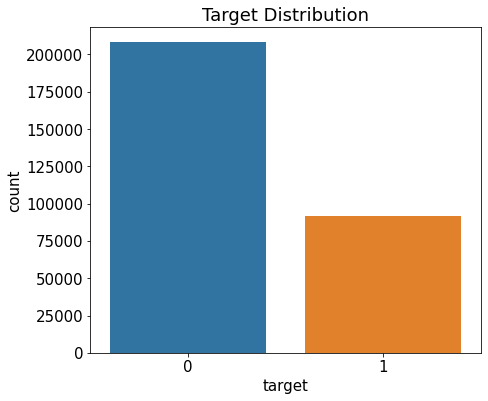

In [ ]:
mpl.rc('font', size=15) # 폰트크기
plt.figure(figsize = (7, 6))
ax = sns.countplot(x='target', data= train)
plt.title("Target Distribution") # 제목 '타겟분포'

>> ax.patches 

In [ ]:
print(ax.patches) # ax.patches는 그래프 도형 객체모두를 담은 리스트

[<matplotlib.patches.Rectangle object at 0x7ff804960290>, <matplotlib.patches.Rectangle object at 0x7ff8049608d0>]


In [ ]:
rectangle = ax.patches[0] # 첫 번째 Rectangle 객체
print('사각형 높이:', rectangle.get_height())
print('사각형 너비:', rectangle.get_width())
print('사각형 왼쪽 테두리의 x축 위치:', rectangle.get_x())

사각형 높이: 208236
사각형 너비: 0.8
사각형 왼쪽 테두리의 x축 위치: -0.4


In [ ]:
print('텍스트 위치의 x좌표:', rectangle.get_x() + rectangle.get_width()/ 2.0)
print('텍스트 위치의 y좌표:', rectangle.get_height() + len(train) * 0.001)

텍스트 위치의 x좌표: 0.0
텍스트 위치의 y좌표: 208536.0


` % 표시하는 함수 `

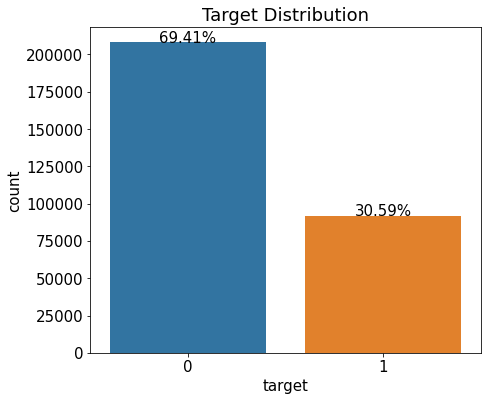

In [ ]:
def write_percent(ax, total_size):
  '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''
  for patch in ax.patches:
    height = patch.get_height()          # 도형높이(=타겟값 갯수)
    width = patch.get_width()            # 도형너비
    left_coord = patch.get_x()           # 도형 왼쪽 테두리 x축 위치
    percent = height / total_size * 100  # 타깃값 비율(높이를 전체갯수로 나누면 됨)

  # (x,y) 좌표에 텍스트 입력
    ax.text(x=left_coord + width / 2,      # x축 위치를 어디로 할 것이냐
          y=height,   # y축 위치를 어디로 할 것이냐
          s=f'{percent:.2f}%',          # 입력텍스트를 뭘로 할 것이냐
          ha= 'center')                  # 가운데 정렬

plt.figure(figsize = (7,6))
ax = sns.countplot(x='target', data=train)
plt.title('Target Distribution')
write_percent(ax, len(train))
plt.show()

## 1. 이진 피처 분포

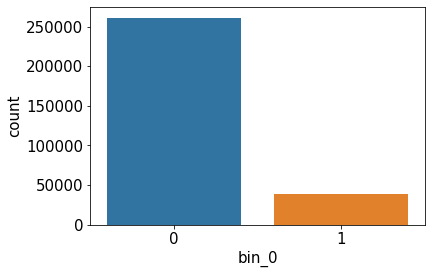

In [ ]:
sns.countplot(x='bin_0', data=train)

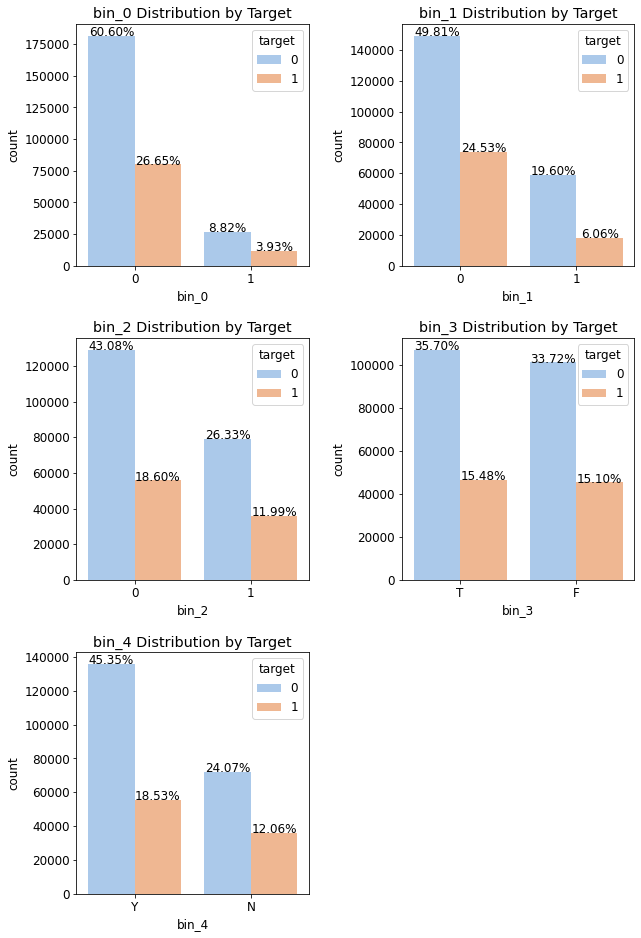

In [ ]:
import matplotlib.gridspec as gridspec

# 3행 2열 틀 준비
mpl.rc('font', size=12)
plt.figure(figsize=(10, 16))
plt.subplots_adjust(wspace=0.4, hspace=0.3) # 서브플롯의 좌우/상하 여백 결정
grid = gridspec.GridSpec(3,2) # 그래프(서브플롯) 3행 2열 배치 

# 서브플롯 그리기
bin_features = ['bin_0','bin_1','bin_2','bin_3','bin_4']  # 피처목록

for idx, feature in enumerate(bin_features):
  ax = plt.subplot(grid[idx])

  # ax축에 타깃값 분포 카운트플롯 그리기
  sns.countplot(x=feature,
                data=train,
                hue='target',
                palette='pastel',
                ax=ax)
  
  ax.set_title(f'{feature} Distribution by Target')
  write_percent(ax, len(train))


## 2. 명목형 피처 분포

명목형 피처는 순서를 무시해도 됨, 즉 순서대로 인코딩 할 필요 없음, 인코딩숫자가 0, 1, 2 ... 이렇게 있을 때 0과 1이 관계가 없고 1과 2가 관계가 없기에 보통 원핫인코딩 함

In [ ]:
resumetable(train)[7:16] # 명목형 nom_1 ~ nom_9 
# nom_1 ~ nom_4 까지는 고유값이 많지 않다. 반면 nom_5 부터는 많다.
# nom_5 부터는 고유값의 개수가 많으니 nom_4 까지만 시각화 한다.

데이터셋 형상 : (300000, 25)


,피처,데이터타입,결측값 개수,고유값 개수,첫 번째 값,두 번째 값,세 번째 값
7,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
8,nom_2,object,0,6,Snake,Hamster,Lion
9,nom_3,object,0,6,Finland,Russia,Russia
10,nom_4,object,0,4,Bassoon,Piano,Theremin
11,nom_5,object,0,222,50f116bcf,b3b4d25d0,3263bdce5
12,nom_6,object,0,522,3ac1b8814,fbcb50fc1,0922e3cb8
13,nom_7,object,0,1220,68f6ad3e9,3b6dd5612,a6a36f527
14,nom_8,object,0,2215,c389000ab,4cd920251,de9c9f684
15,nom_9,object,0,11981,2f4cb3d51,f83c56c21,ae6800dd0


- 1. 교차분석표 생성함수 만들기
- 2. 포인트플롯 생성함수 만들기
- 3. 피처분포도 및 포인트플롯 생성함수 만들기

> 스텝1 : 교차분석표 생성함수 만들기

명목형 피처별 타깃값 비율을 구하기위해서 교차분석표를 만들자

In [ ]:
pd.crosstab(train['nom_0'], train['target']) # pd.crosstab(a,b)

target,0,1
nom_0,,
Blue,72914,23252
Green,85682,41659
Red,49640,26853


In [ ]:
pd.crosstab(train['target'], train['nom_0'])

nom_0,Blue,Green,Red
target,,,
0,72914,85682,49640
1,23252,41659,26853


In [ ]:
# 정규화 후 비율을 백분율로 표현
crosstab = pd.crosstab(train['nom_0'], train['target'], normalize='index' ) * 100
crosstab

target,0,1
nom_0,,
Blue,75.820976,24.179024
Green,67.285478,32.714522
Red,64.894827,35.105173


In [ ]:
# 정규화 후 비율을 백분율로 표현
crosstab = pd.crosstab( train['target'],train['nom_0'], normalize='columns') * 100
crosstab

nom_0,Blue,Green,Red
target,,,
0,75.820976,67.285478,64.894827
1,24.179024,32.714522,35.105173


In [ ]:
crosstab = crosstab.reset_index()
crosstab

nom_0,target,Blue,Green,Red
0,0,75.820976,67.285478,64.894827
1,1,24.179024,32.714522,35.105173


In [ ]:
def get_crosstab(df, feature):
  crosstab = pd.crosstab(train[feature], train['target'], normalize='index') * 100
  crosstab = crosstab.reset_index()
  return crosstab

In [ ]:
crosstab = get_crosstab(train, 'nom_0')
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [ ]:
crosstab[1]

0    24.179024
1    32.714522
2    35.105173
Name: 1, dtype: float64

> 스텝2 : 포인트플롯 생성 함수 만들기

- ax : 포인트플롯을 그릴 축
- feature : 포인트플롯으로 그릴 피쳐
- crosstab : 교차분석표

In [ ]:
import seaborn as sns

In [ ]:
def plot_pointplot(ax, feature, crosstab):
  ax2 = ax.twinx() # x축은 공유하고 y축은 공유하지 않는 새로운 축 생성
  # 새로운 축에 포인트플롯 그리기
  ax2 = sns.pointplot(x=feature, y=1, data=crosstab, order=crosstab[feature].values, # 포인트플롯 순서
                     color='black',  # 포인트플롯 색상
                     legend=False)   # 범례 미표시

  ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1) # y축 범위 설정
  ax2.set_ylabel('Target 1 Ratio(%')

In [ ]:
def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, size=(15,20)):
  plt.figure(figsize=size) # 전체 Figure 크기 설정
  grid = gridspec.GridSpec(num_rows, num_cols) # 서브플롯 배치
  plt.subplots_adjust(wspace=0.45, hspace=0.3) # 서브플롯 좌우상하 여백설정

  for idx, feature in enumerate(features): 
    ax = plt.subplot(grid[idx])
    crosstab = get_crosstab(df, feature) # 교차 분석표 생성

    # ax축에 타깃값 분포 카운트플롯 그리기
    sns.countplot(x=feature, data=df,
                  order= crosstab[feature].values,
                  color= 'skyblue',
                  ax=ax)
    write_percent(ax, len(df)) # 비율 표시
    plot_pointplot(ax, feature, crosstab) # 포인트플롯 그리기
    ax.set_title(f'{feature} Distribution') # 그래프 제목설정
    

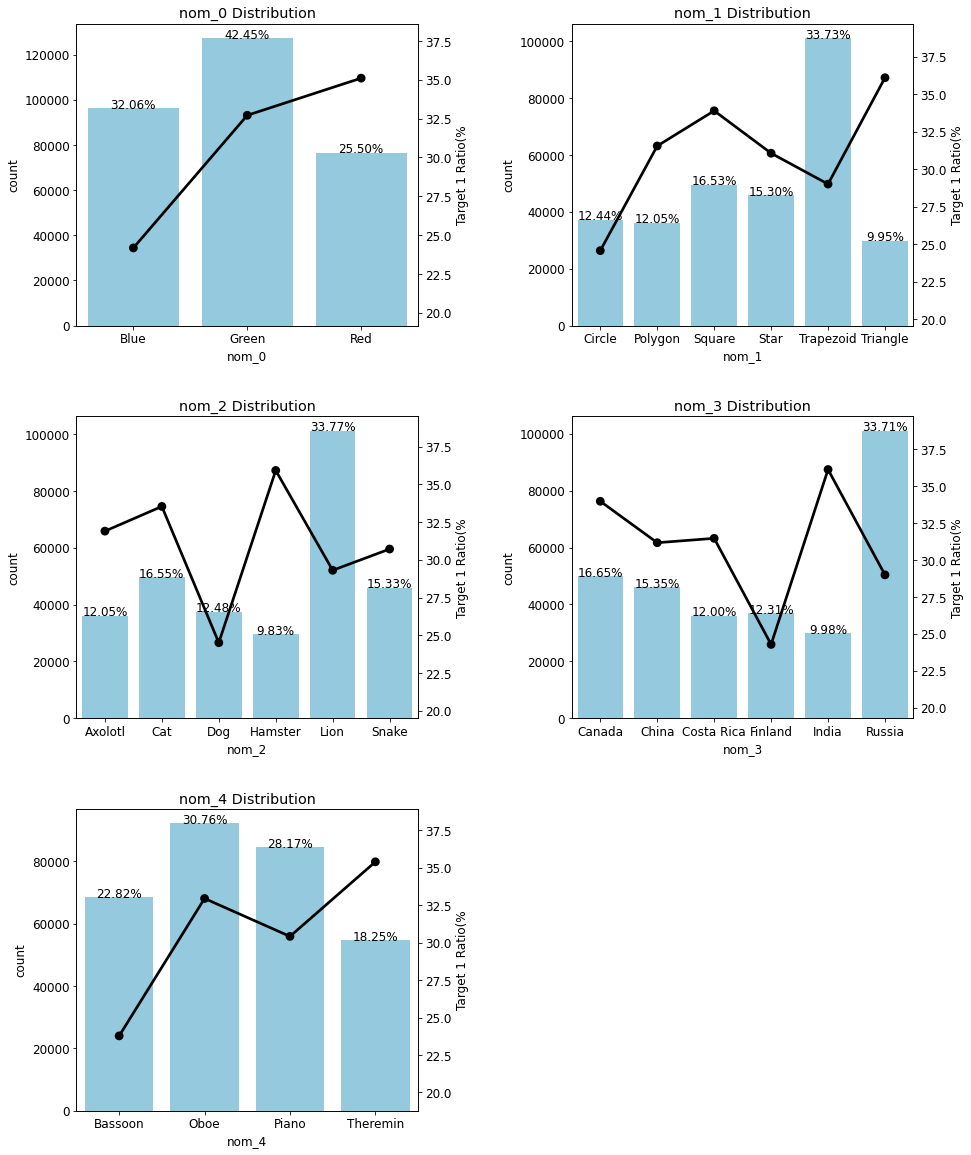

In [ ]:
nom_features = ['nom_' + str(i) for i in range(5)]
plot_cat_dist_with_true_ratio(train, nom_features,3, 2)

## 3. 순서형 피처 분포

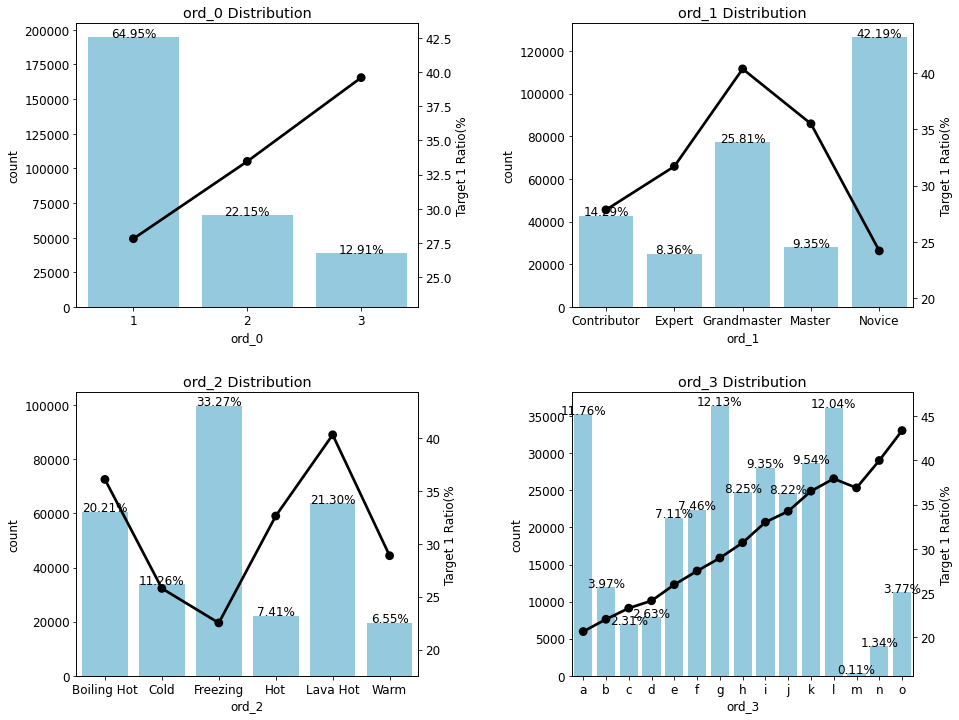

In [ ]:
ord_features = [ 'ord_' + str(i) for i in range(4)]
plot_cat_dist_with_true_ratio(train, ord_features, 2,2, size=(15,12))

In [ ]:
from pandas.api.types import CategoricalDtype

ord_1_values = ['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster']
ord_2_values = ['Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot', 'Lava Hot']

# 순서를 지정한 범주형 데이터 타입
ord_1_dtype = CategoricalDtype(categories=ord_1_values, ordered=True)
ord_2_dtype = CategoricalDtype(categories=ord_2_values, ordered=True)

train['ord_1'] = train['ord_1'].astype(ord_1_dtype)
train['ord_2'] = train['ord_2'].astype(ord_2_dtype)

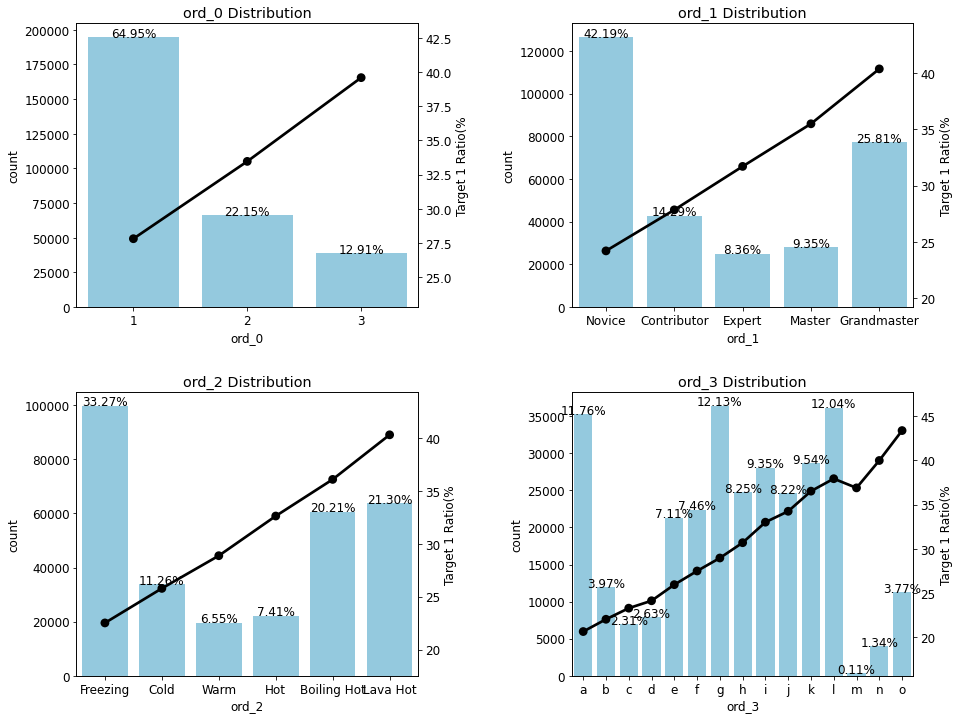

In [ ]:
ord_features = [ 'ord_' + str(i) for i in range(4)]
plot_cat_dist_with_true_ratio(train, ord_features, 2,2, size=(15,12))

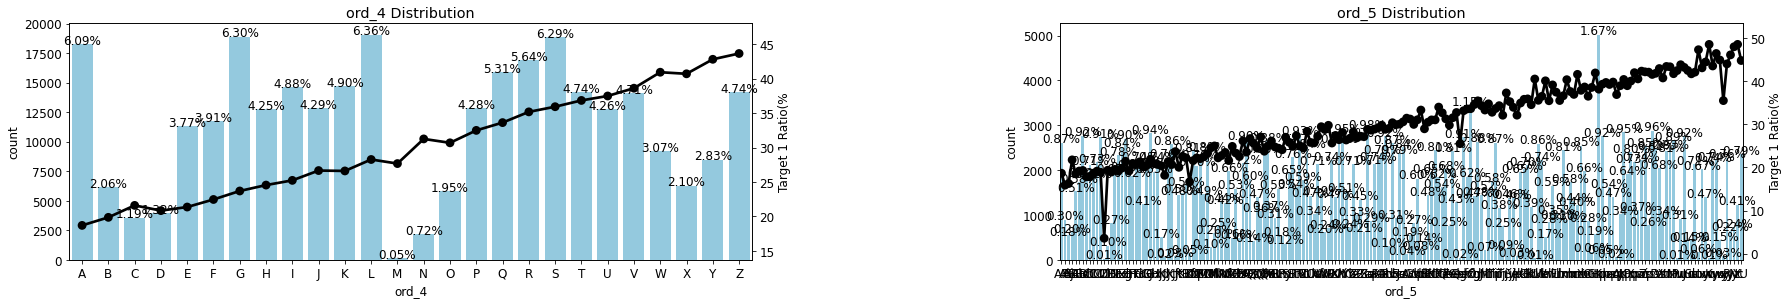

In [ ]:
ord_features = [ 'ord_' + str(i) for i in range(4,6)]
plot_cat_dist_with_true_ratio(train, ord_features, 2,2, size=(30,10))

## 4. 날짜 피처 분포

In [ ]:
date_features = ['day','month']
plot_cat_dist_with_true_ratio(train, date_features, 2,1, size=(10,10))

# 5. 분석 정리 및 모델링 전략

분석 정리

1. 결측값은 없습니다

2. 모든 피처가 중요함

3. 이진 피처 인코딩 : 0과 1로 인코딩

4. 명목형 피처 인코딩 : 원핫인코딩

5. 순서형 피처 인코딩 : 순서에 맞게 인코딩

6. 날짜 피처 인코딩 : 원핫 인코딩

모델링 전략

    베이스 라인 모델 : 로지스틱 회귀 모델

    피처 엔지니어링 : 모든 피처 원 핫 인코딩

    성능 개선 : 추가 피처 엔지니어링 + 하이퍼파라미터 최적화

    피처 엔지니어링 : 피처 맞춤으로 인코딩 + 피처 맞춤으로 스케일링

    하이퍼파라미터 최적화 : 그리드서치
    